In [1]:
import time
START = time.time()

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import fashion_mnist

In [4]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 3s 1us/step


# Data preprocessing

In [5]:
np.unique(np.array(train_labels))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

 This dataset contains 10 classes

In [7]:
print(train_images[0].shape)#(28,28,3)

(28, 28)


CLASS :  6


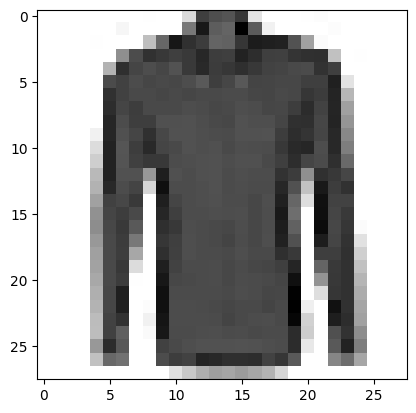

In [8]:
print("CLASS : ",train_labels[40])
plt.imshow(train_images[40], cmap=plt.cm.binary)
plt.show()

In [9]:
print(train_images.shape , train_labels.shape)

(60000, 28, 28) (60000,)


In [10]:
train_images = train_images.reshape((60000 , 28*28)).astype('float32')
train_images.shape
# Here we converted the 3d tensor to 2D , 60000 RECORDS and 784 FEATURES

(60000, 784)

In [11]:
# Now we normalize them in the range of 0-1
#COLOUR intensity is between 0-255 we divide each by 255 so if it is 255 we get 1
#and if it is 0 then 0/255=0
train_images = train_images/255
train_images[0]
# here we see all values converted between 0-1

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

 lets do the same for test set

In [12]:
test_images = (test_images.reshape((10000,28*28)).astype('float32'))/255
print(test_images.shape,test_labels.shape)

(10000, 784) (10000,)


In [13]:
train_labels = pd.get_dummies(train_labels)
train_labels = np.array(train_labels)


In [14]:
print(train_labels[5:10,])

[[0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]]


we do the same for test data


In [15]:
test_labels = np.array(pd.get_dummies(test_labels))
print(test_labels[0:10,])

[[0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]]


# Data modelling

In [16]:
from keras import models
from keras import layers
from keras import regularizers
from keras.optimizers import rmsprop_v2

ImportError: cannot import name 'rmsprop_v2' from 'keras.optimizers' (C:\Users\sitar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\__init__.py)

# Model_1

In [16]:
model_1 = models.Sequential()
model_1.add(layers.Dense(28*28,activation='relu',input_dim=784))
model_1.add(layers.Dense(10,activation='softmax'))

We need 10 units since there are 10 categories of fashion Dresses we are classifing.
This is a Multinomial classification problem so we are using softmax activation.

In [46]:
model_1.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics=['accuracy'])

In [47]:
history = model_1.fit(x= train_images,y=train_labels ,epochs = 100 , batch_size = 500,validation_split=0.25,verbose = 0)

In [48]:
model_1.evaluate(train_images,train_labels)
#training score

1875/1875 [==============================] - 11s 6ms/step - loss: 0.1554 - accuracy: 0.9735


[0.15543386340141296, 0.9735000133514404]

In [49]:
model_1.evaluate(test_images,test_labels)
# testing score

313/313 [==============================] - 2s 6ms/step - loss: 0.6578 - accuracy: 0.8976


[0.6577860116958618, 0.897599995136261]

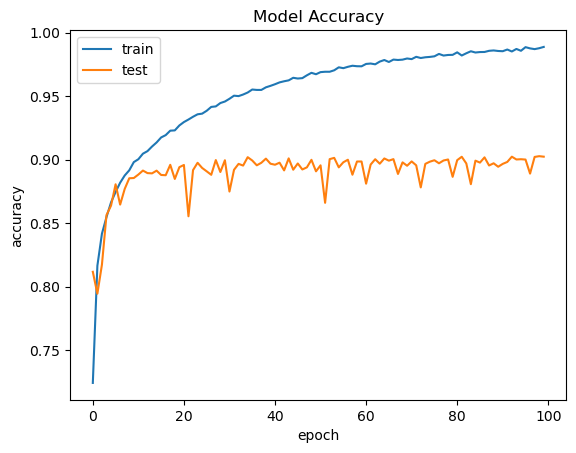

In [50]:
#model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

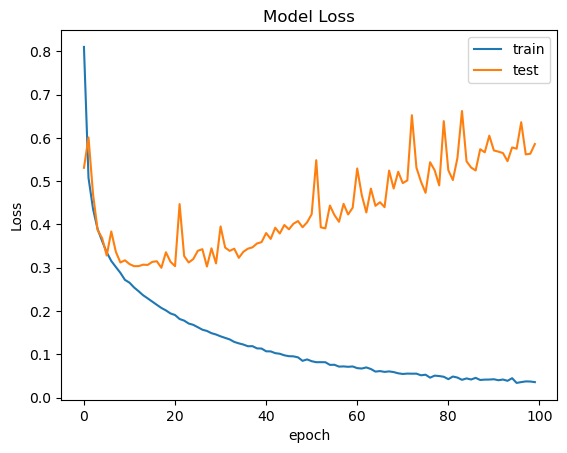

In [51]:
# model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Here we see our model is overfitted
as we increse the epochs the train accuracy goes on increasing

# Model_2
(here we add one more hidden layer)

In [23]:
model_2 = models.Sequential()
model_2.add(layers.Dense(500,activation='relu',input_dim=784))
model_2.add(layers.Dense(250,activation = 'relu',input_dim = 500))
model_2.add(layers.Dense(10,activation='softmax'))



model_2.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics=['accuracy'])



history = model_2.fit(train_images,train_labels,batch_size=500,validation_split=0.25,epochs=100)

#training score
train_score = model_2.evaluate(train_images,train_labels)
print(100*"*")
print()
print("Training score : " ,train_score[1])
print("Training loss : ",train_score[0])
print(100*"*")
print()




#testing score
print(100*"*")
print()
test_score = model_2.evaluate(test_images , test_labels)
print("Testing score : " ,test_score[1])
print("Testing loss : ",test_score[0])
print(100*"*")
print()

Epoch 1/100
90/90 [==============================] - 2s 13ms/step - loss: 0.7673 - accuracy: 0.7194 - val_loss: 0.5071 - val_accuracy: 0.8212
Epoch 2/100
90/90 [==============================] - 1s 9ms/step - loss: 0.4866 - accuracy: 0.8203 - val_loss: 0.4262 - val_accuracy: 0.8432
Epoch 3/100
90/90 [==============================] - 1s 10ms/step - loss: 0.4132 - accuracy: 0.8478 - val_loss: 0.3868 - val_accuracy: 0.8547
Epoch 4/100
90/90 [==============================] - 1s 10ms/step - loss: 0.3752 - accuracy: 0.8598 - val_loss: 0.4051 - val_accuracy: 0.8433
Epoch 5/100
90/90 [==============================] - 1s 10ms/step - loss: 0.3452 - accuracy: 0.8708 - val_loss: 0.3363 - val_accuracy: 0.8745
Epoch 6/100
90/90 [==============================] - 1s 10ms/step - loss: 0.3193 - accuracy: 0.8798 - val_loss: 0.3498 - val_accuracy: 0.8710
Epoch 7/100
90/90 [==============================] - 1s 10ms/step - loss: 0.3039 - accuracy: 0.8849 - val_loss: 0.3584 - val_accuracy: 0.8655
Epoch 8

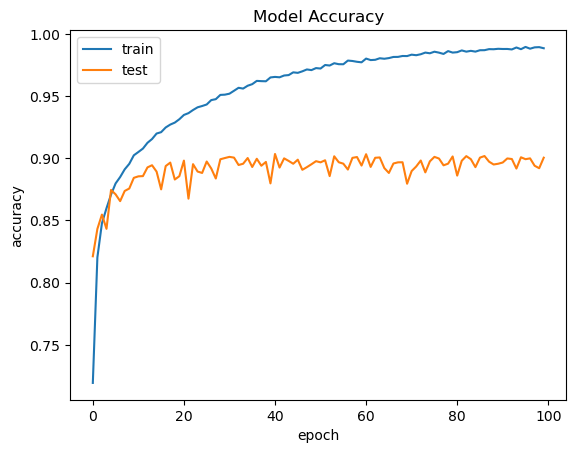

In [24]:
#model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

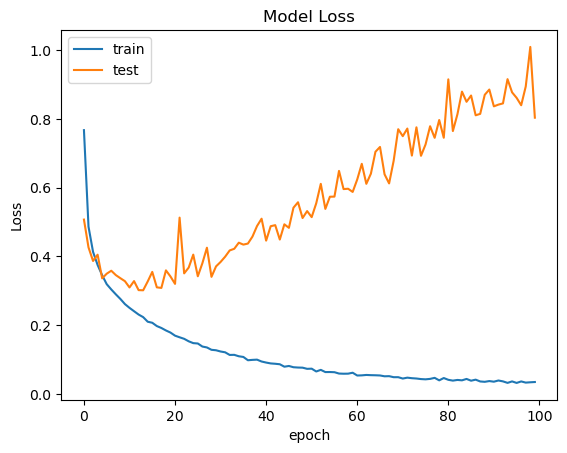

In [25]:
# model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# Model_3
(decrease the number of epochs)

In [26]:
model_3 = models.Sequential()
model_3.add(layers.Dense(500,activation='relu',input_dim=784))
model_3.add(layers.Dense(250,activation = 'relu',input_dim = 500))
model_3.add(layers.Dense(10,activation='softmax'))



model_3.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics=['accuracy'])



history = model_3.fit(train_images,train_labels,batch_size=500,validation_split=0.25,epochs=10)

#training score
train_score = model_3.evaluate(train_images,train_labels)
print(100*"*")
print()
print("Training score : " ,train_score[1])
print("Training loss : ",train_score[0])
print(100*"*")
print()




#testing score
print(100*"*")
print()
test_score = model_3.evaluate(test_images , test_labels)
print("Testing score : " ,test_score[1])
print("Testing loss : ",test_score[0])
print(100*"*")
print()

Epoch 1/10
90/90 [==============================] - 3s 12ms/step - loss: 0.7601 - accuracy: 0.7271 - val_loss: 0.5990 - val_accuracy: 0.7789
Epoch 2/10
90/90 [==============================] - 1s 8ms/step - loss: 0.4813 - accuracy: 0.8231 - val_loss: 0.5666 - val_accuracy: 0.7812
Epoch 3/10
90/90 [==============================] - 1s 10ms/step - loss: 0.4150 - accuracy: 0.8453 - val_loss: 0.4037 - val_accuracy: 0.8477
Epoch 4/10
90/90 [==============================] - 1s 10ms/step - loss: 0.3723 - accuracy: 0.8624 - val_loss: 0.4416 - val_accuracy: 0.8323
Epoch 5/10
90/90 [==============================] - 1s 9ms/step - loss: 0.3414 - accuracy: 0.8706 - val_loss: 0.3749 - val_accuracy: 0.8637
Epoch 6/10
90/90 [==============================] - 1s 9ms/step - loss: 0.3233 - accuracy: 0.8783 - val_loss: 0.3708 - val_accuracy: 0.8669
Epoch 7/10
90/90 [==============================] - 1s 9ms/step - loss: 0.3052 - accuracy: 0.8849 - val_loss: 0.3234 - val_accuracy: 0.8825
Epoch 8/10
90/90 

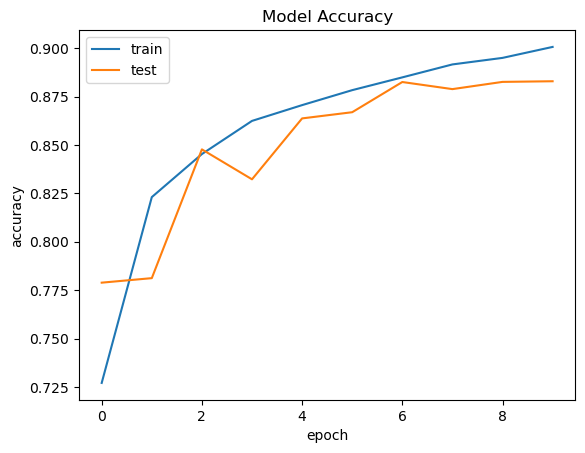

In [27]:
#model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

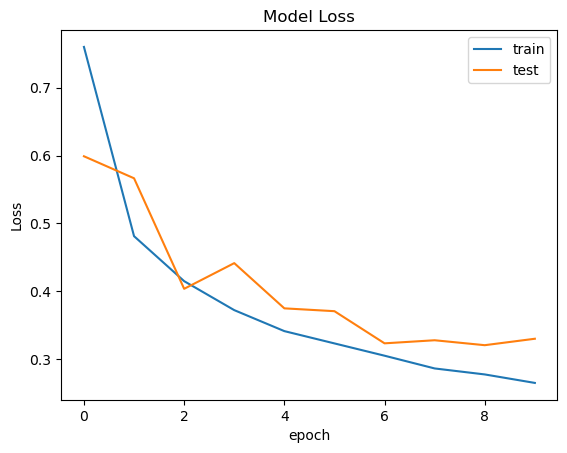

In [28]:
# model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

This model looks better in the above three

but still it is overfitted

To overcome this we will try regularization on model_3

# Regularization

# L2

In [46]:
model_3 = models.Sequential()
model_3.add(layers.Dense(500,activation='relu',input_dim=784,
                         kernel_regularizer=regularizers.L2(0.001)))  #L2
model_3.add(layers.Dense(250,activation = 'relu',input_dim = 500,
                        kernel_regularizer=regularizers.L2(0.001)))    #L2
model_3.add(layers.Dense(10,activation='softmax'))



model_3.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics=['accuracy'])



history = model_3.fit(train_images,train_labels,batch_size=500,
                      validation_split=0.25,epochs=10)

#training score
train_score = model_3.evaluate(train_images,train_labels)
print(100*"*")
print()
print("Training score : " ,train_score[1])
print("Training loss : ",train_score[0])
print(100*"*")
print()




#testing score
print(100*"*")
print()
test_score = model_3.evaluate(test_images , test_labels)
print("Testing score : " ,test_score[1])
print("Testing loss : ",test_score[0])
print(100*"*")
print()

Epoch 1/10
90/90 [==============================] - 2s 17ms/step - loss: 1.4356 - accuracy: 0.7236 - val_loss: 1.0399 - val_accuracy: 0.8013
Epoch 2/10
90/90 [==============================] - 1s 12ms/step - loss: 0.9489 - accuracy: 0.8051 - val_loss: 0.9159 - val_accuracy: 0.7963
Epoch 3/10
90/90 [==============================] - 1s 12ms/step - loss: 0.7848 - accuracy: 0.8260 - val_loss: 0.7008 - val_accuracy: 0.8448
Epoch 4/10
90/90 [==============================] - 1s 13ms/step - loss: 0.6903 - accuracy: 0.8369 - val_loss: 0.6783 - val_accuracy: 0.8357
Epoch 5/10
90/90 [==============================] - 1s 12ms/step - loss: 0.6199 - accuracy: 0.8451 - val_loss: 0.6502 - val_accuracy: 0.8296
Epoch 6/10
90/90 [==============================] - 1s 11ms/step - loss: 0.5785 - accuracy: 0.8498 - val_loss: 0.6000 - val_accuracy: 0.8361
Epoch 7/10
90/90 [==============================] - 1s 11ms/step - loss: 0.5475 - accuracy: 0.8558 - val_loss: 0.5241 - val_accuracy: 0.8598
Epoch 8/10
90

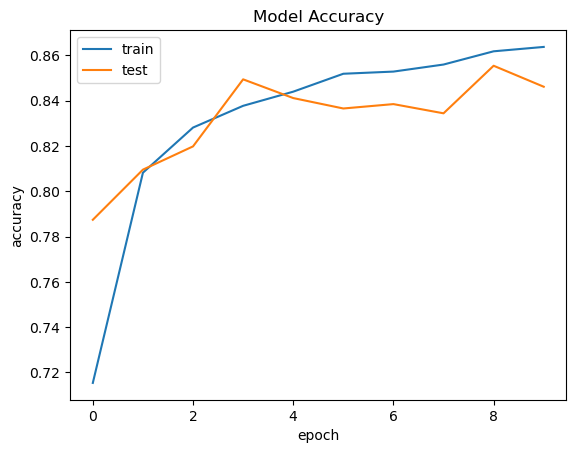

In [18]:
#model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

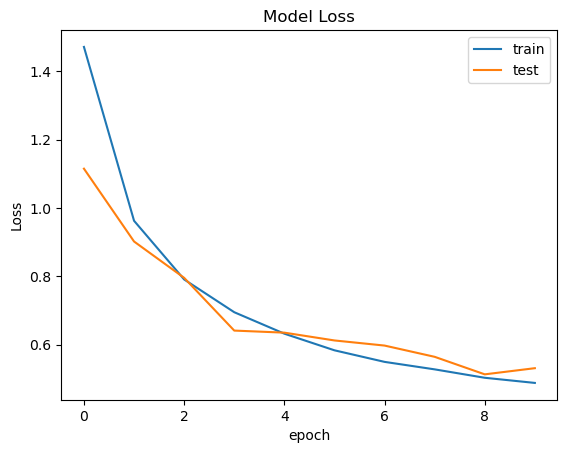

In [19]:
# model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [20]:
pred = model_3.predict(test_images)

313/313 [==============================] - 1s 4ms/step


In [33]:
def check(x):
    for i in test_labels[x]:
        i = round(i)
        print(i," ",end="")
    
    print("\n")

    for i in pred[x]:
        i = round(i)
        print(i," ",end="")


In [35]:
check(2)

0  1  0  0  0  0  0  0  0  0  

0  1  0  0  0  0  0  0  0  0  

In [24]:
len(test_labels)

10000

In [36]:
STOP = time.time()
print((STOP-START)/60)

4.3962029099464415
